# Radial distribution of E field: $E_z (x,y) = J_m(k_{sm}r) e^{im\phi}$

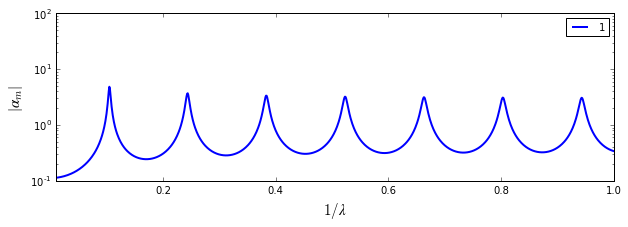

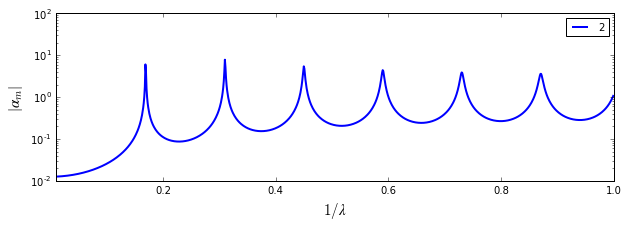

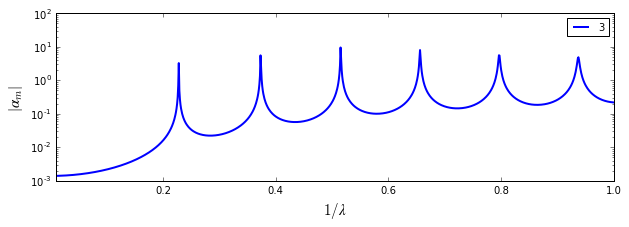

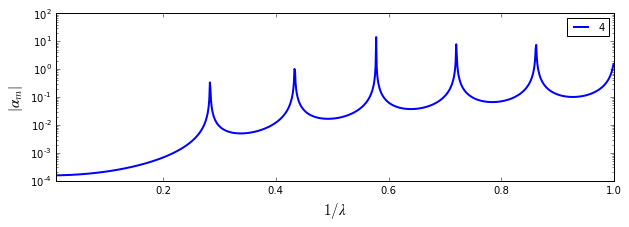

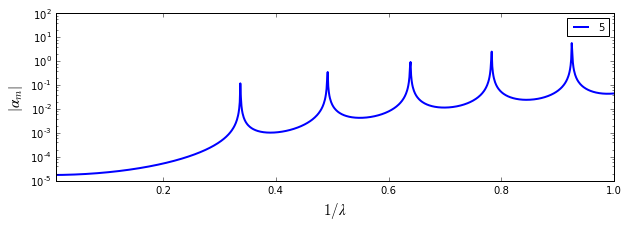

In [73]:
import numpy as np
import time
import scipy as sp
from scipy import special
import matplotlib.pyplot as plt
%matplotlib inline

ti=time.clock()
R=0.4 #radius
ɛ=80 #relative permitivity
xi = np.sqrt(1/ɛ)
N=1000

A = np.zeros((2,2),dtype=np.complex_)
B = np.zeros((2,1),dtype=np.complex_)
x = np.zeros((2,1),dtype=np.complex_)
αm = np.zeros((N,1),dtype=np.complex_)
abs = np.zeros((N,1))
xm = np.zeros((N,1))


for m in range (1,6):
    for i in range (1,N):
            λ = N/i
            kv  = 2*3.14/λ
            k   = kv*np.sqrt(ɛ)

            A[0,0] = sp.special.jv(m,k*R)
            A[0,1] = -(sp.special.hankel1e(m, kv*R))/((sp.special.hankel1e(m-1, kv*R) - sp.special.hankel1e(m+1, kv*R))/2)
            A[1,0] = (sp.special.jv(m-1, k*R) - sp.special.jv(m+1, k*R))/2/xi
            A[1,1] = -1


            B[0,0] = sp.special.jv(m,kv*R)
            B[1,0] = (sp.special.jv(m-1, kv*R) - sp.special.jv(m+1, kv*R))/2

            x = np.linalg.solve(A, B)
            αm[i,0] = x[0,0]
            abs[i,0] = np.absolute(αm[i,0])
            xm[i,0] = 1/λ
        
    plt.figure(figsize=(10,3))
    plt.axis([0.01,1,10**(-m),100])
    line, = plt.plot(xm, abs, linewidth = 2, label = m)
    plt.yscale('log')
    plt.xlabel(r'$1/λ$', fontsize = 15)
    plt.ylabel(r'$\vert α_m \vert$', fontsize = 15) 
    plt.legend(handles=[line], loc=1, fontsize=10)
    #plt.axis().set_aspect('equal', 'datal.im')


In [49]:
ρ = np.linspace(0, 10, 200)
Φ = np.linspace(0, 2*np.pi, 200)

def E(n, ρ, Φ):
    return sp.special.jn(n, ρ)*np.exp(1j*n*Φ)

ρ1, Φ1 = np.meshgrid(ρ,Φ)

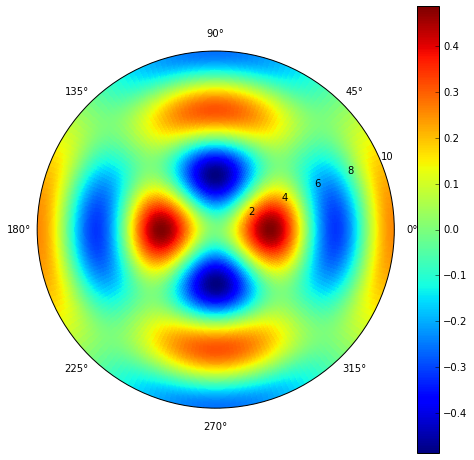

In [52]:
values = E(2, ρ1, Φ1)

fig, ax = plt.subplots(subplot_kw=dict(projection='polar'), figsize=(8,8)
                       )
plot = ax.pcolormesh(Φ1, ρ1, values.real)

plt.colorbar(plot)
plt.show()